In [10]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
import sys
env = gym.make("CartPole-v0")

In [11]:
#Hyperparameters
episodes = 20000*5
eps = 1.0
learning_rate = 0.001
tot_rewards = []
tot_loss = []
decay_val = 0.0001
mem_size = 1000000
batch_size = 300
gamma = 0.99
update_target = 100
max_steps = 200

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(state_size, 300),
            nn.ReLU(),
            nn.Linear(300, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_size)
        )
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [13]:
model = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
target = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)

opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=mem_size)

In [14]:
#Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32)
# print("state = ", state)
# out = model(state)
# print("out = ", out)

In [15]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
    state = torch.stack(list(state), dim=0).reshape(batch_size, -1)

    next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32)
    
    reward = torch.from_numpy(np.array(reward))
    done = torch.from_numpy(np.array(done)).long()
    action = torch.from_numpy(np.array(action)).type(torch.int64)
    
    q_values = model(state)
    next_q_values = target(next_state)

    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1))
    max_next_q_values = torch.max(next_q_values,-1)[0].detach()

    loss = ((reward + gamma*max_next_q_values*(1-done) - q_vals.squeeze())**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss
    

Episode =  0  Epsilon =  1.0


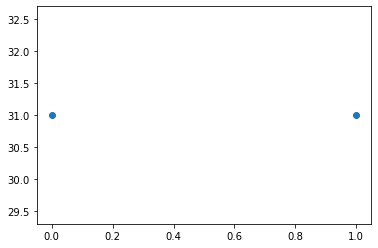

Episode =  1  Epsilon =  0.9969049545486349
Episode =  2  Epsilon =  0.9954107927251674
Episode =  3  Epsilon =  0.9941176640657154
Episode =  4  Epsilon =  0.9915364442377761
Episode =  5  Epsilon =  0.990050328741211
Episode =  6  Epsilon =  0.9879735083147863
Episode =  7  Epsilon =  0.9865913822222994
Episode =  8  Epsilon =  0.9845218175995203
Episode =  9  Epsilon =  0.9800036429119608
Episode =  10  Epsilon =  0.9786326662671404
Episode =  11  Epsilon =  0.9774590700450109
Episode =  12  Epsilon =  0.9740441137043471
Episode =  13  Epsilon =  0.9724869670279722
Episode =  14  Epsilon =  0.9709323096698301
Episode =  15  Epsilon =  0.9697679478721413
Episode =  16  Epsilon =  0.9681208251664835
Episode =  17  Epsilon =  0.9661866150798343
Episode =  18  Epsilon =  0.9644491302509279
Episode =  19  Epsilon =  0.9634852113555888
Episode =  20  Epsilon =  0.9609835284850657
Episode =  21  Epsilon =  0.958775916475263
Episode =  22  Epsilon =  0.9562864612572199
Episode =  23  Epsilo

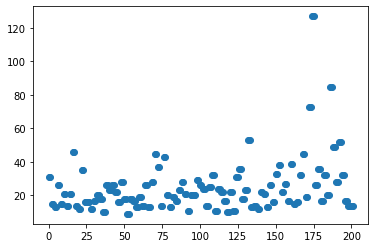

Episode =  101  Epsilon =  0.7781099383636219
Episode =  102  Epsilon =  0.7752363946005022
Episode =  103  Epsilon =  0.7730688770103613
Episode =  104  Epsilon =  0.7690595525901689
Episode =  105  Epsilon =  0.7645356859483627
Episode =  106  Epsilon =  0.7618646216875617
Episode =  107  Epsilon =  0.7591269766470387
Episode =  108  Epsilon =  0.7541334849197496
Episode =  109  Epsilon =  0.7521753823987392
Episode =  110  Epsilon =  0.7420155486394936
Episode =  111  Epsilon =  0.7361033999773828
Episode =  112  Epsilon =  0.7317733924963463
Episode =  113  Epsilon =  0.7218169521678679
Episode =  114  Epsilon =  0.720374832968173
Episode =  115  Epsilon =  0.7129221285674276
Episode =  116  Epsilon =  0.7108577524038187
Episode =  117  Epsilon =  0.7085867566750061
Episode =  118  Epsilon =  0.7056876431695556
Episode =  119  Epsilon =  0.7048413681773398
Episode =  120  Epsilon =  0.7038553299507846
Episode =  121  Epsilon =  0.7011858883179982
Episode =  122  Epsilon =  0.700134

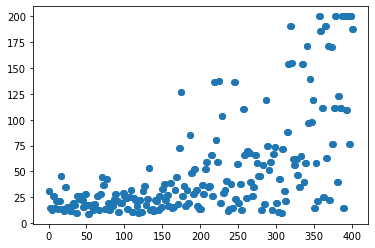

Episode =  201  Epsilon =  0.3629285400807445
Episode =  202  Epsilon =  0.3557424292108414
Episode =  203  Epsilon =  0.3549961912448682
Episode =  204  Epsilon =  0.35308447367909807
Episode =  205  Epsilon =  0.3491521860988163
Episode =  206  Epsilon =  0.34223885181208064
Episode =  207  Epsilon =  0.3412137249712002
Episode =  208  Epsilon =  0.34036179860602667
Episode =  209  Epsilon =  0.3336225170380396
Episode =  210  Epsilon =  0.32964316963174256
Episode =  211  Epsilon =  0.32763856677978437
Episode =  212  Epsilon =  0.32115120961131244
Episode =  213  Epsilon =  0.3207340051403531
Episode =  214  Epsilon =  0.3143833606851831
Episode =  215  Epsilon =  0.3089915715744206
Episode =  216  Epsilon =  0.30287343137330686
Episode =  217  Epsilon =  0.29687643246847417
Episode =  218  Epsilon =  0.29099817622027363
Episode =  219  Epsilon =  0.2890551021581374
Episode =  220  Epsilon =  0.2833317109606377
Episode =  221  Epsilon =  0.27930909884279953
Episode =  222  Epsilon 

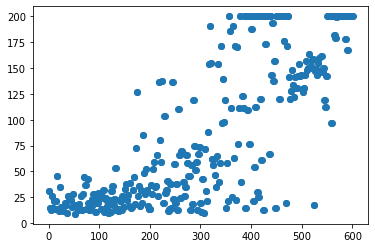

Episode =  301  Epsilon =  0.07699831014438538
Episode =  302  Epsilon =  0.07547371691903682
Episode =  303  Epsilon =  0.07397931116791233
Episode =  304  Epsilon =  0.07251449516856054
Episode =  305  Epsilon =  0.07107868303364157
Episode =  306  Epsilon =  0.06967130047658827
Episode =  307  Epsilon =  0.06829178458190617
Episode =  308  Epsilon =  0.0669395835800231
Episode =  309  Epsilon =  0.0656141566265953
Episode =  310  Epsilon =  0.0643149735861846
Episode =  311  Epsilon =  0.06304151482021807
Episode =  312  Epsilon =  0.06179327097914687
Episode =  313  Epsilon =  0.060569742798719586
Episode =  314  Epsilon =  0.059370440900290006
Episode =  315  Epsilon =  0.05819488559507866
Episode =  316  Epsilon =  0.05704260669231029
Episode =  317  Epsilon =  0.0559131433111498
Episode =  318  Epsilon =  0.054806043696362494
Episode =  319  Epsilon =  0.05447820831527987
Episode =  320  Epsilon =  0.05400632715588297
Episode =  321  Epsilon =  0.052952865844905946
Episode =  32

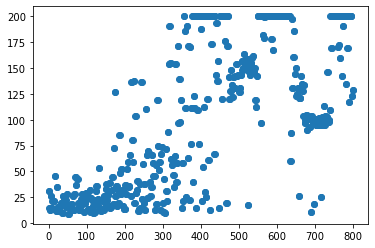

Episode =  401  Epsilon =  0.018100795102289454
Episode =  402  Epsilon =  0.01774239308626307
Episode =  403  Epsilon =  0.0174904948247297
Episode =  404  Epsilon =  0.017144176965704288
Episode =  405  Epsilon =  0.016804716320307292
Episode =  406  Epsilon =  0.016537993666101047
Episode =  407  Epsilon =  0.01624298754994061
Episode =  408  Epsilon =  0.01605406141470899
Episode =  409  Epsilon =  0.015887972638866762
Episode =  410  Epsilon =  0.015648313461254598
Episode =  411  Epsilon =  0.015383015329080329
Episode =  412  Epsilon =  0.015122215004232675
Episode =  413  Epsilon =  0.014836135754768229
Episode =  414  Epsilon =  0.014542375125221205
Episode =  415  Epsilon =  0.014254431057944727
Episode =  416  Epsilon =  0.013972188382990044
Episode =  417  Epsilon =  0.013695534210813336
Episode =  418  Epsilon =  0.01342435788712283
Episode =  419  Epsilon =  0.013158550948620106
Episode =  420  Epsilon =  0.012898007079617628
Episode =  421  Epsilon =  0.01264262206951532

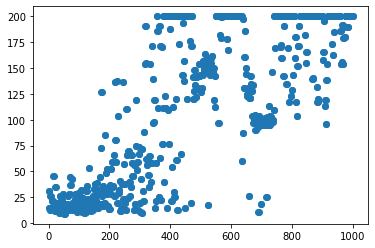

Episode =  501  Epsilon =  0.0028810296697918516
Episode =  502  Epsilon =  0.0028282232267766174
Episode =  503  Epsilon =  0.0027722234267390394
Episode =  504  Epsilon =  0.002717332442149462
Episode =  505  Epsilon =  0.002677681784057667
Episode =  506  Epsilon =  0.0026246627567574734
Episode =  507  Epsilon =  0.0025726935245720746
Episode =  508  Epsilon =  0.002521753301194369
Episode =  509  Epsilon =  0.0024718217118933584
Episode =  510  Epsilon =  0.002422878785364772
Episode =  511  Epsilon =  0.0023749049457430817
Episode =  512  Epsilon =  0.002327881004771686
Episode =  513  Epsilon =  0.002281788154128114
Episode =  514  Epsilon =  0.0022366079579011974
Episode =  515  Epsilon =  0.002192322345217194
Episode =  516  Epsilon =  0.0021489136030119296
Episode =  517  Epsilon =  0.002106364368946042
Episode =  518  Epsilon =  0.0020646576244604934
Episode =  519  Epsilon =  0.0020237766879696284
Episode =  520  Epsilon =  0.001983705208188953
Episode =  521  Epsilon =  0.

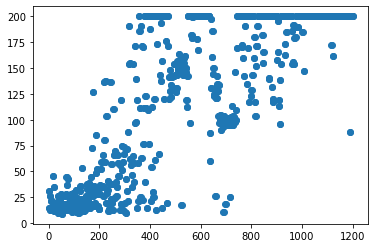

Episode =  601  Epsilon =  0.00039965504873469814
Episode =  602  Epsilon =  0.0003917417402655288
Episode =  603  Epsilon =  0.0003839851180464807
Episode =  604  Epsilon =  0.0003763820796354999
Episode =  605  Epsilon =  0.0003689664769783636
Episode =  606  Epsilon =  0.0003628199230993229
Episode =  607  Epsilon =  0.0003556359628832941
Episode =  608  Epsilon =  0.0003485942475692114
Episode =  609  Epsilon =  0.0003416919606587201
Episode =  610  Epsilon =  0.00033492634142110936
Episode =  611  Epsilon =  0.00032905059272905806
Episode =  612  Epsilon =  0.00032253527695743945
Episode =  613  Epsilon =  0.0003161489666960434
Episode =  614  Epsilon =  0.00030988910759105893
Episode =  615  Epsilon =  0.00030375319586576635
Episode =  616  Epsilon =  0.00029773877731909264
Episode =  617  Epsilon =  0.0002918434463439963
Episode =  618  Epsilon =  0.00028606484496528924
Episode =  619  Epsilon =  0.0002804006618965096
Episode =  620  Epsilon =  0.0002748486316154677
Episode =  6

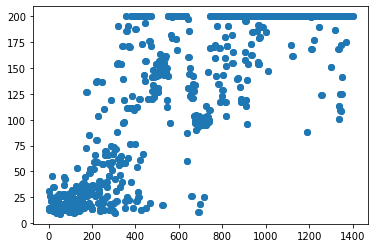

Episode =  701  Epsilon =  5.8991741262480764e-05
Episode =  702  Epsilon =  5.782368434133995e-05
Episode =  703  Epsilon =  5.6678755352038853e-05
Episode =  704  Epsilon =  5.5556496353511835e-05
Episode =  705  Epsilon =  5.44564584720851e-05
Episode =  706  Epsilon =  5.337820172193912e-05
Episode =  707  Epsilon =  5.2321294829126075e-05
Episode =  708  Epsilon =  5.1285315059071755e-05
Episode =  709  Epsilon =  5.026984804749306e-05
Episode =  710  Epsilon =  4.927448763466323e-05
Episode =  711  Epsilon =  4.829883570295899e-05
Episode =  712  Epsilon =  4.734250201762385e-05
Episode =  713  Epsilon =  4.6405104070684776e-05
Episode =  714  Epsilon =  4.5486266927959185e-05
Episode =  715  Epsilon =  4.4585623079091205e-05
Episode =  716  Epsilon =  4.370281229055749e-05
Episode =  717  Epsilon =  4.283748146158309e-05
Episode =  718  Epsilon =  4.198928448291094e-05
Episode =  719  Epsilon =  4.115788209836721e-05
Episode =  720  Epsilon =  4.037926494360836e-05
Episode =  72

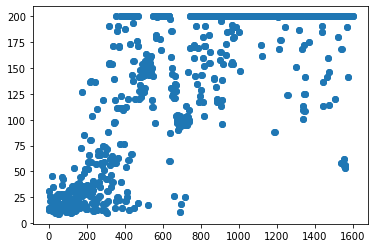

Episode =  801  Epsilon =  9.121103497353211e-06
Episode =  802  Epsilon =  8.990707232926777e-06
Episode =  803  Epsilon =  8.871041291516867e-06
Episode =  804  Epsilon =  8.71018559696873e-06
Episode =  805  Epsilon =  8.537720903551872e-06
Episode =  806  Epsilon =  8.368671070833932e-06
Episode =  807  Epsilon =  8.202968483389618e-06
Episode =  808  Epsilon =  8.040546864602502e-06
Episode =  809  Epsilon =  7.881341250156115e-06
Episode =  810  Epsilon =  7.725287962049969e-06
Episode =  811  Epsilon =  7.572324583130072e-06
Episode =  812  Epsilon =  7.422389932123672e-06
Episode =  813  Epsilon =  7.275424039168469e-06
Episode =  814  Epsilon =  7.131368121826191e-06
Episode =  815  Epsilon =  6.990164561571229e-06
Episode =  816  Epsilon =  6.851756880744739e-06
Episode =  817  Epsilon =  6.716089719965096e-06
Episode =  818  Epsilon =  6.5831088159856245e-06
Episode =  819  Epsilon =  6.452760979990724e-06
Episode =  820  Epsilon =  6.3249940763218e-06
Episode =  821  Epsilo

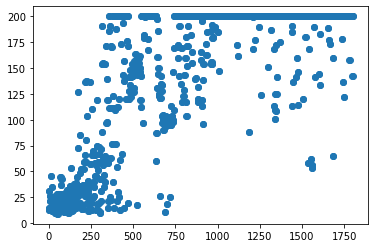

Episode =  901  Epsilon =  1.3159878401205666e-06
Episode =  902  Epsilon =  1.2899308248181967e-06
Episode =  903  Epsilon =  1.2643897474491169e-06
Episode =  904  Epsilon =  1.239354392263444e-06
Episode =  905  Epsilon =  1.2148147457866878e-06
Episode =  906  Epsilon =  1.1907609928146164e-06
Episode =  907  Epsilon =  1.1671835124874481e-06
Episode =  908  Epsilon =  1.1440728744417546e-06
Episode =  909  Epsilon =  1.1214198350385745e-06
Episode =  910  Epsilon =  1.0992153336661993e-06
Episode =  911  Epsilon =  1.0774504891161802e-06
Episode =  912  Epsilon =  1.0561165960310632e-06
Episode =  913  Epsilon =  1.0352051214224917e-06
Episode =  914  Epsilon =  1.0272650474978106e-06
Episode =  915  Epsilon =  1.0189782218970405e-06
Episode =  916  Epsilon =  1.0086379858857424e-06
Episode =  917  Epsilon =  9.990018703749922e-07
Episode =  918  Epsilon =  9.899526422404659e-07
Episode =  919  Epsilon =  9.703512368466903e-07
Episode =  920  Epsilon =  9.60120344790375e-07
Episod

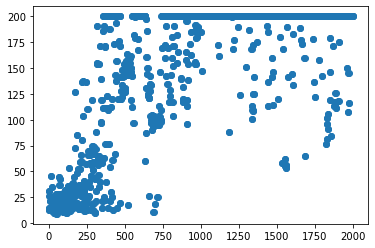

Episode =  1001  Epsilon =  2.1232838896042313e-07
Episode =  1002  Epsilon =  2.0812421327460331e-07
Episode =  1003  Epsilon =  2.0400328172435938e-07
Episode =  1004  Epsilon =  1.99963946046958e-07
Episode =  1005  Epsilon =  1.9600459061583897e-07
Episode =  1006  Epsilon =  1.921236317944081e-07
Episode =  1007  Epsilon =  1.883195173026243e-07
Episode =  1008  Epsilon =  1.8459072559612953e-07
Episode =  1009  Epsilon =  1.8093576525767128e-07
Episode =  1010  Epsilon =  1.773531744005755e-07
Episode =  1011  Epsilon =  1.7384152008403086e-07
Episode =  1012  Epsilon =  1.7039939773995065e-07
Episode =  1013  Epsilon =  1.6702543061118313e-07
Episode =  1014  Epsilon =  1.6373464102776531e-07
Episode =  1015  Epsilon =  1.6049263839163354e-07
Episode =  1016  Epsilon =  1.5731482853124333e-07
Episode =  1017  Epsilon =  1.5419994040738882e-07
Episode =  1018  Epsilon =  1.5114672814788056e-07
Episode =  1019  Epsilon =  1.4815397054923002e-07
Episode =  1020  Epsilon =  1.452204

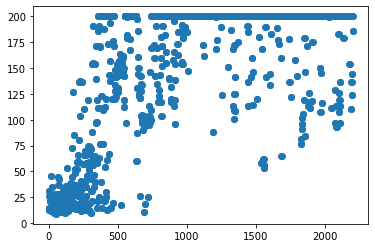

Episode =  1101  Epsilon =  3.287220127367489e-08
Episode =  1102  Epsilon =  3.234722250015986e-08
Episode =  1103  Epsilon =  3.197418119331028e-08
Episode =  1104  Epsilon =  3.134108132472904e-08
Episode =  1105  Epsilon =  3.100753608072856e-08
Episode =  1106  Epsilon =  3.0597886540687696e-08
Episode =  1107  Epsilon =  3.020270799990879e-08
Episode =  1108  Epsilon =  2.983947538327697e-08
Episode =  1109  Epsilon =  2.9433482272386206e-08
Episode =  1110  Epsilon =  2.9006896414093414e-08
Episode =  1111  Epsilon =  2.8589351806713155e-08
Episode =  1112  Epsilon =  2.824269793513054e-08
Episode =  1113  Epsilon =  2.7872362430173298e-08
Episode =  1114  Epsilon =  2.7320479994626072e-08
Episode =  1115  Epsilon =  2.6779525022562757e-08
Episode =  1116  Epsilon =  2.6249281146419332e-08
Episode =  1117  Epsilon =  2.5729536282784564e-08
Episode =  1118  Epsilon =  2.5220082547572224e-08
Episode =  1119  Epsilon =  2.472071617287311e-08
Episode =  1120  Epsilon =  2.4231237425

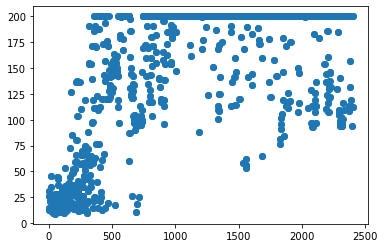

Episode =  1201  Epsilon =  6.082475172593405e-09
Episode =  1202  Epsilon =  5.962040056236978e-09
Episode =  1203  Epsilon =  5.843989596922328e-09
Episode =  1204  Epsilon =  5.728276577613619e-09
Episode =  1205  Epsilon =  5.614854716188657e-09
Episode =  1206  Epsilon =  5.5036786469273286e-09
Episode =  1207  Epsilon =  5.394703902366483e-09
Episode =  1208  Epsilon =  5.2878868955141725e-09
Episode =  1209  Epsilon =  5.1831849024159756e-09
Episode =  1210  Epsilon =  5.080556045066588e-09
Episode =  1211  Epsilon =  4.979959274659709e-09
Episode =  1212  Epsilon =  4.8813543551696435e-09
Episode =  1213  Epsilon =  4.7847018472579455e-09
Episode =  1214  Epsilon =  4.689963092498739e-09
Episode =  1215  Epsilon =  4.5971001979163745e-09
Episode =  1216  Epsilon =  4.506076020829248e-09
Episode =  1217  Epsilon =  4.416854153993726e-09
Episode =  1218  Epsilon =  4.329398911042233e-09
Episode =  1219  Epsilon =  4.2436753122096165e-09
Episode =  1220  Epsilon =  4.1596490703422

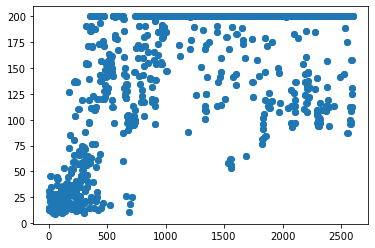

Episode =  1301  Epsilon =  9.199887406801295e-10
Episode =  1302  Epsilon =  9.01772644783898e-10
Episode =  1303  Epsilon =  8.839172338993712e-10
Episode =  1304  Epsilon =  8.664153663383188e-10
Episode =  1305  Epsilon =  8.492600418204125e-10
Episode =  1306  Epsilon =  8.324443986733e-10
Episode =  1307  Epsilon =  8.159617110881196e-10
Episode =  1308  Epsilon =  7.998053864293557e-10
Episode =  1309  Epsilon =  7.869535625769945e-10
Episode =  1310  Epsilon =  7.713716093117993e-10
Episode =  1311  Epsilon =  7.633913130490313e-10
Episode =  1312  Epsilon =  7.563250362602652e-10
Episode =  1313  Epsilon =  7.49174325597549e-10
Episode =  1314  Epsilon =  7.415719655335014e-10
Episode =  1315  Epsilon =  7.32140804117946e-10
Episode =  1316  Epsilon =  7.252912662910422e-10
Episode =  1317  Epsilon =  7.176441624661173e-10
Episode =  1318  Epsilon =  7.034345593429428e-10
Episode =  1319  Epsilon =  6.895063112860794e-10
Episode =  1320  Epsilon =  6.758538473677071e-10
Episod

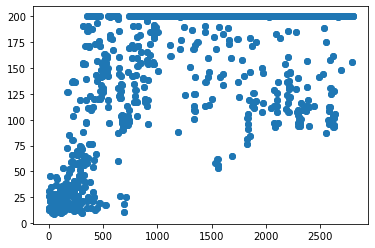

Episode =  1401  Epsilon =  1.350651642576642e-10
Episode =  1402  Epsilon =  1.323908271972573e-10
Episode =  1403  Epsilon =  1.2976944293746324e-10
Episode =  1404  Epsilon =  1.271999629944785e-10
Episode =  1405  Epsilon =  1.2468135964484224e-10
Episode =  1406  Epsilon =  1.222126255143747e-10
Episode =  1407  Epsilon =  1.197927731752533e-10
Episode =  1408  Epsilon =  1.1742083475106916e-10
Episode =  1409  Epsilon =  1.1509586152970152e-10
Episode =  1410  Epsilon =  1.1281692358385836e-10
Episode =  1411  Epsilon =  1.1058310939913031e-10
Episode =  1412  Epsilon =  1.0839352550940914e-10
Episode =  1413  Epsilon =  1.062472961395254e-10
Episode =  1414  Epsilon =  1.0451913652988404e-10
Episode =  1415  Epsilon =  1.0244962140450092e-10
Episode =  1416  Epsilon =  1.0042108339581038e-10
Episode =  1417  Epsilon =  9.843271114270082e-11
Episode =  1418  Epsilon =  9.648370934929193e-11
Episode =  1419  Epsilon =  9.46868488641855e-11
Episode =  1420  Epsilon =  9.28120164420

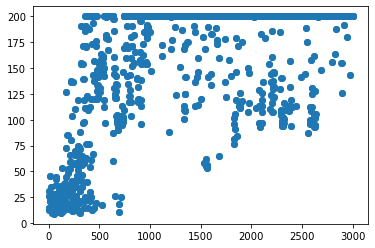

Episode =  1501  Epsilon =  1.874741907484137e-11
Episode =  1502  Epsilon =  1.837621368006482e-11
Episode =  1503  Epsilon =  1.8012358280749577e-11
Episode =  1504  Epsilon =  1.7655707344438285e-11
Episode =  1505  Epsilon =  1.7306118220266705e-11
Episode =  1506  Epsilon =  1.6963451081907105e-11
Episode =  1507  Epsilon =  1.662756887164157e-11
Episode =  1508  Epsilon =  1.629833724554242e-11
Episode =  1509  Epsilon =  1.6071761582876545e-11
Episode =  1510  Epsilon =  1.575353513371518e-11
Episode =  1511  Epsilon =  1.5441609678531612e-11
Episode =  1512  Epsilon =  1.5135860455461384e-11
Episode =  1513  Epsilon =  1.4836165172968193e-11
Episode =  1514  Epsilon =  1.4542403960930619e-11
Episode =  1515  Epsilon =  1.4254459322697093e-11
Episode =  1516  Epsilon =  1.3972216088090523e-11
Episode =  1517  Epsilon =  1.3695561367343215e-11
Episode =  1518  Epsilon =  1.3424384505944e-11
Episode =  1519  Epsilon =  1.3158577040379381e-11
Episode =  1520  Epsilon =  1.289803265

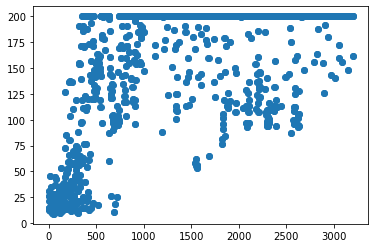

Episode =  1601  Epsilon =  2.604797083134569e-12
Episode =  1602  Epsilon =  2.5647360067214483e-12
Episode =  1603  Epsilon =  2.5280702683474136e-12
Episode =  1604  Epsilon =  2.4847129427102926e-12
Episode =  1605  Epsilon =  2.4355147653439507e-12
Episode =  1606  Epsilon =  2.387290728939555e-12
Episode =  1607  Epsilon =  2.3400215451684595e-12
Episode =  1608  Epsilon =  2.2936883076176124e-12
Episode =  1609  Epsilon =  2.248272484227494e-12
Episode =  1610  Epsilon =  2.2037559098797806e-12
Episode =  1611  Epsilon =  2.1601207791317893e-12
Episode =  1612  Epsilon =  2.117349639094771e-12
Episode =  1613  Epsilon =  2.075425382453229e-12
Episode =  1614  Epsilon =  2.0343312406224353e-12
Episode =  1615  Epsilon =  1.9940507770414567e-12
Episode =  1616  Epsilon =  1.9545678805989527e-12
Episode =  1617  Epsilon =  1.9158667591891823e-12
Episode =  1618  Epsilon =  1.8779319333955623e-12
Episode =  1619  Epsilon =  1.840748230299329e-12
Episode =  1620  Epsilon =  1.8043007

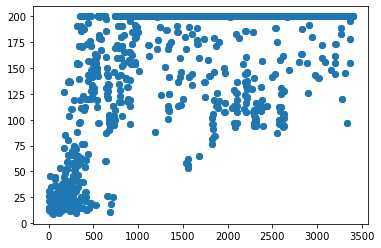

Episode =  1701  Epsilon =  3.693732755150131e-13
Episode =  1702  Epsilon =  3.620595566500275e-13
Episode =  1703  Epsilon =  3.548906519532067e-13
Episode =  1704  Epsilon =  3.478636940538347e-13
Episode =  1705  Epsilon =  3.4097587235612823e-13
Episode =  1706  Epsilon =  3.342244319150761e-13
Episode =  1707  Epsilon =  3.2760667233453256e-13
Episode =  1708  Epsilon =  3.211199466871304e-13
Episode =  1709  Epsilon =  3.1476166045558234e-13
Episode =  1710  Epsilon =  3.0852927049494324e-13
Episode =  1711  Epsilon =  3.024202840154181e-13
Episode =  1712  Epsilon =  2.9785848131045485e-13
Episode =  1713  Epsilon =  2.934828540718397e-13
Episode =  1714  Epsilon =  2.8767179185196906e-13
Episode =  1715  Epsilon =  2.821450184543457e-13
Episode =  1716  Epsilon =  2.7675209831040656e-13
Episode =  1717  Epsilon =  2.7127231085281394e-13
Episode =  1718  Epsilon =  2.6590102508595337e-13
Episode =  1719  Epsilon =  2.606360926387463e-13
Episode =  1720  Epsilon =  2.55475407678

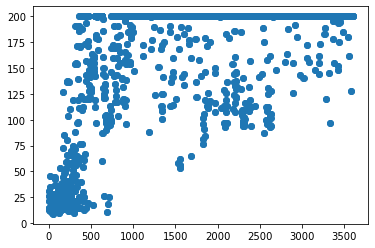

Episode =  1801  Epsilon =  5.146522119422341e-14
Episode =  1802  Epsilon =  5.04461919788205e-14
Episode =  1803  Epsilon =  4.944733989503679e-14
Episode =  1804  Epsilon =  4.846826542867358e-14
Episode =  1805  Epsilon =  4.750857697605183e-14
Episode =  1806  Epsilon =  4.6567890687381036e-14
Episode =  1807  Epsilon =  4.5645830313229686e-14
Episode =  1808  Epsilon =  4.499327267464846e-14
Episode =  1809  Epsilon =  4.4102390282847884e-14
Episode =  1810  Epsilon =  4.322914767114864e-14
Episode =  1811  Epsilon =  4.237319556579155e-14
Episode =  1812  Epsilon =  4.166730723765619e-14
Episode =  1813  Epsilon =  4.0842280114152703e-14
Episode =  1814  Epsilon =  4.003358881361553e-14
Episode =  1815  Epsilon =  3.9240909881088545e-14
Episode =  1816  Epsilon =  3.8463926266136036e-14
Episode =  1817  Epsilon =  3.770232719603046e-14
Episode =  1818  Epsilon =  3.6955808051452403e-14
Episode =  1819  Epsilon =  3.6224070244650255e-14
Episode =  1820  Epsilon =  3.5506821100013

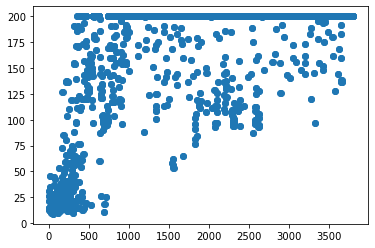

Episode =  1901  Epsilon =  7.208814701882353e-15
Episode =  1902  Epsilon =  7.066077672502432e-15
Episode =  1903  Epsilon =  6.926166885771099e-15
Episode =  1904  Epsilon =  6.78902638110445e-15
Episode =  1905  Epsilon =  6.65460130595753e-15
Episode =  1906  Epsilon =  6.522837893884796e-15
Episode =  1907  Epsilon =  6.393683443034947e-15
Episode =  1908  Epsilon =  6.2670862950716204e-15
Episode =  1909  Epsilon =  6.1429958145114046e-15
Episode =  1910  Epsilon =  6.021362368471007e-15
Episode =  1911  Epsilon =  5.902137306815431e-15
Episode =  1912  Epsilon =  5.832904823100985e-15
Episode =  1913  Epsilon =  5.717411286155469e-15
Episode =  1914  Epsilon =  5.6042045612668465e-15
Episode =  1915  Epsilon =  5.49323936876387e-15
Episode =  1916  Epsilon =  5.384471325528492e-15
Episode =  1917  Epsilon =  5.277856927243766e-15
Episode =  1918  Epsilon =  5.173353530993295e-15
Episode =  1919  Epsilon =  5.0709193382052256e-15
Episode =  1920  Epsilon =  4.970513377933892e-15

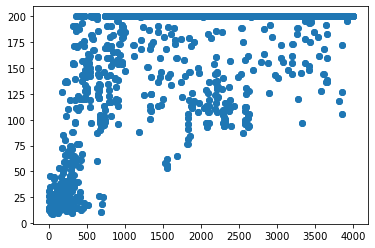

Episode =  2001  Epsilon =  1.0036096238575774e-15
Episode =  2002  Epsilon =  9.89261914073184e-16
Episode =  2003  Epsilon =  9.696741853364995e-16
Episode =  2004  Epsilon =  9.504743004171124e-16
Episode =  2005  Epsilon =  9.376359902162699e-16
Episode =  2006  Epsilon =  9.190704726634012e-16
Episode =  2007  Epsilon =  9.008725587921353e-16
Episode =  2008  Epsilon =  8.830349699221789e-16
Episode =  2009  Epsilon =  8.655505714936321e-16
Episode =  2010  Epsilon =  8.484123702133534e-16
Episode =  2011  Epsilon =  8.316135112578294e-16
Episode =  2012  Epsilon =  8.151472755314281e-16
Episode =  2013  Epsilon =  7.990070769789376e-16
Episode =  2014  Epsilon =  7.831864599513244e-16
Episode =  2015  Epsilon =  7.676790966236423e-16
Episode =  2016  Epsilon =  7.524787844640702e-16
Episode =  2017  Epsilon =  7.375794437530695e-16
Episode =  2018  Epsilon =  7.22975115151654e-16
Episode =  2019  Epsilon =  7.086599573178134e-16
Episode =  2020  Epsilon =  6.946282445701357e-16
E

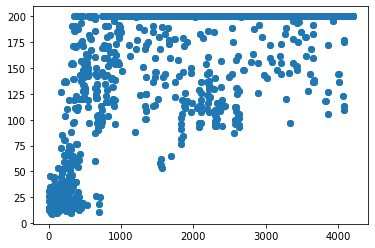

Episode =  2101  Epsilon =  1.4170625414696008e-16
Episode =  2102  Epsilon =  1.3890042120521296e-16
Episode =  2103  Epsilon =  1.3615014472810008e-16
Episode =  2104  Epsilon =  1.3345432467836828e-16
Episode =  2105  Epsilon =  1.3081188279988326e-16
Episode =  2106  Epsilon =  1.2822176218635526e-16
Episode =  2107  Epsilon =  1.2568292685860586e-16
Episode =  2108  Epsilon =  1.2319436135020302e-16
Episode =  2109  Epsilon =  1.2075507030130248e-16
Episode =  2110  Epsilon =  1.1836407806052957e-16
Episode =  2111  Epsilon =  1.1602042829474463e-16
Episode =  2112  Epsilon =  1.137231836065361e-16
Episode =  2113  Epsilon =  1.1147142515928608e-16
Episode =  2114  Epsilon =  1.0926425230965966e-16
Episode =  2115  Epsilon =  1.0710078224737247e-16
Episode =  2116  Epsilon =  1.0498014964208937e-16
Episode =  2117  Epsilon =  1.0290150629731617e-16
Episode =  2118  Epsilon =  1.0086402081114284e-16
Episode =  2119  Epsilon =  9.886687824370556e-17
Episode =  2120  Epsilon =  9.690

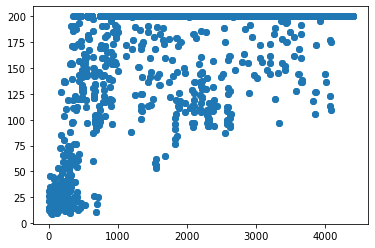

Episode =  2201  Epsilon =  1.917977379502365e-17
Episode =  2202  Epsilon =  1.880000762695088e-17
Episode =  2203  Epsilon =  1.8427760960617508e-17
Episode =  2204  Epsilon =  1.8062884907283128e-17
Episode =  2205  Epsilon =  1.7705233526255986e-17
Episode =  2206  Epsilon =  1.735466376652065e-17
Episode =  2207  Epsilon =  1.7011035409521312e-17
Episode =  2208  Epsilon =  1.6674211013078204e-17
Episode =  2209  Epsilon =  1.634405585641434e-17
Episode =  2210  Epsilon =  1.6020437886270784e-17
Episode =  2211  Epsilon =  1.570322766408893e-17
Episode =  2212  Epsilon =  1.5392298314238488e-17
Episode =  2213  Epsilon =  1.508752547327058e-17
Episode =  2214  Epsilon =  1.4788787240175736e-17
Episode =  2215  Epsilon =  1.4495964127626715e-17
Episode =  2216  Epsilon =  1.4397730854774674e-17
Episode =  2217  Epsilon =  1.431590131603888e-17
Episode =  2218  Epsilon =  1.4220310144696833e-17
Episode =  2219  Epsilon =  1.4131008252118123e-17
Episode =  2220  Epsilon =  1.38512093

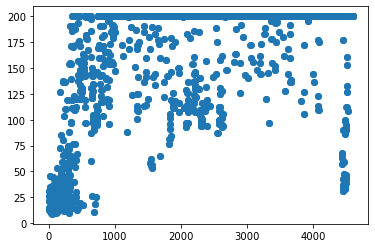

Episode =  2301  Epsilon =  4.381232601517394e-18
Episode =  2302  Epsilon =  4.2944826776499165e-18
Episode =  2303  Epsilon =  4.209450432339018e-18
Episode =  2304  Epsilon =  4.1261018549540055e-18
Episode =  2305  Epsilon =  4.0444036082864454e-18
Episode =  2306  Epsilon =  3.964323015216211e-18
Episode =  2307  Epsilon =  3.88582804564144e-18
Episode =  2308  Epsilon =  3.80888730366742e-18
Episode =  2309  Epsilon =  3.733470015049033e-18
Episode =  2310  Epsilon =  3.659546014881846e-18
Episode =  2311  Epsilon =  3.5870857355370415e-18
Episode =  2312  Epsilon =  3.5160601948350546e-18
Episode =  2313  Epsilon =  3.446440984453535e-18
Episode =  2314  Epsilon =  3.378200258564763e-18
Episode =  2315  Epsilon =  3.3113107226980564e-18
Episode =  2316  Epsilon =  3.2457456228227068e-18
Episode =  2317  Epsilon =  3.1814787346470935e-18
Episode =  2318  Epsilon =  3.1184843531296535e-18
Episode =  2319  Epsilon =  3.0567372821975547e-18
Episode =  2320  Epsilon =  2.996212824668

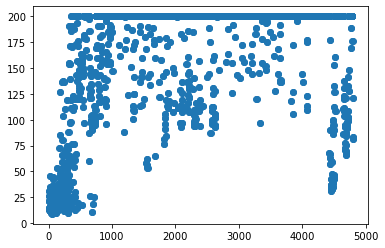

Episode =  2401  Epsilon =  9.330536571129125e-19
Episode =  2402  Epsilon =  9.270087777205712e-19
Episode =  2403  Epsilon =  9.204506521933801e-19
Episode =  2404  Epsilon =  9.129341922629208e-19
Episode =  2405  Epsilon =  9.051170111183515e-19
Episode =  2406  Epsilon =  8.967388605978303e-19
Episode =  2407  Epsilon =  8.887936904396537e-19
Episode =  2408  Epsilon =  8.817120592831906e-19
Episode =  2409  Epsilon =  8.747743210422154e-19
Episode =  2410  Epsilon =  8.688463300644289e-19
Episode =  2411  Epsilon =  8.590841150249808e-19
Episode =  2412  Epsilon =  8.501113697922994e-19
Episode =  2413  Epsilon =  8.450262265109752e-19
Episode =  2414  Epsilon =  8.367858254169912e-19
Episode =  2415  Epsilon =  8.288743944351407e-19
Episode =  2416  Epsilon =  8.216126613303584e-19
Episode =  2417  Epsilon =  8.112446749824859e-19
Episode =  2418  Epsilon =  7.996470349398918e-19
Episode =  2419  Epsilon =  7.937517809794159e-19
Episode =  2420  Epsilon =  7.879787787174617e-19


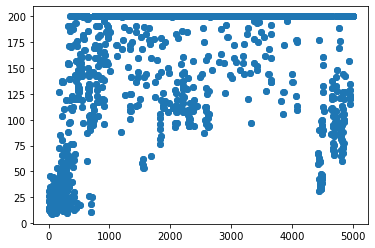

Episode =  2501  Epsilon =  1.8667015159271223e-19
Episode =  2502  Epsilon =  1.8297401789887695e-19
Episode =  2503  Epsilon =  1.7935106893310947e-19
Episode =  2504  Epsilon =  1.7579985561243133e-19
Episode =  2505  Epsilon =  1.7231895754620918e-19
Episode =  2506  Epsilon =  1.7011042905238566e-19
Episode =  2507  Epsilon =  1.667421836037768e-19
Episode =  2508  Epsilon =  1.6344063058234741e-19
Episode =  2509  Epsilon =  1.602044494549267e-19
Episode =  2510  Epsilon =  1.576144125715512e-19
Episode =  2511  Epsilon =  1.5531454116594923e-19
Episode =  2512  Epsilon =  1.522392594251461e-19
Episode =  2513  Epsilon =  1.4922486932857868e-19
Episode =  2514  Epsilon =  1.462701652005885e-19
Episode =  2515  Epsilon =  1.4337396523831306e-19
Episode =  2516  Epsilon =  1.4053511103899615e-19
Episode =  2517  Epsilon =  1.377524671366575e-19
Episode =  2518  Epsilon =  1.3502492054793633e-19
Episode =  2519  Epsilon =  1.3235138032692873e-19
Episode =  2520  Epsilon =  1.2973077

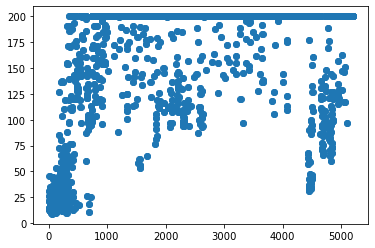

Episode =  2601  Epsilon =  2.6648703296736134e-20
Episode =  2602  Epsilon =  2.6121049736101546e-20
Episode =  2603  Epsilon =  2.5603843898830864e-20
Episode =  2604  Epsilon =  2.5096878916380708e-20
Episode =  2605  Epsilon =  2.4599952016276542e-20
Episode =  2606  Epsilon =  2.4112864441009124e-20
Episode =  2607  Epsilon =  2.363542136853682e-20
Episode =  2608  Epsilon =  2.3167431834361845e-20
Episode =  2609  Epsilon =  2.2708708655149724e-20
Episode =  2610  Epsilon =  2.225906835386083e-20
Episode =  2611  Epsilon =  2.181833108636455e-20
Episode =  2612  Epsilon =  2.1386320569506363e-20
Episode =  2613  Epsilon =  2.0962864010599265e-20
Episode =  2614  Epsilon =  2.054779203831139e-20
Episode =  2615  Epsilon =  2.014093863492192e-20
Episode =  2616  Epsilon =  1.974214106991844e-20
Episode =  2617  Epsilon =  1.935123983490907e-20
Episode =  2618  Epsilon =  1.8968078579823385e-20
Episode =  2619  Epsilon =  1.8592504050376544e-20
Episode =  2620  Epsilon =  1.82243660

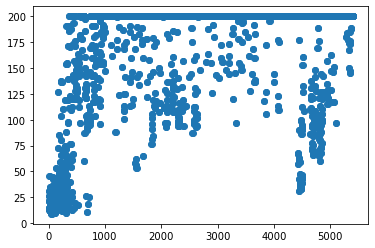

Episode =  2701  Epsilon =  3.74094652553636e-21
Episode =  2702  Epsilon =  3.6668744878704816e-21
Episode =  2703  Epsilon =  3.5942691022207444e-21
Episode =  2704  Epsilon =  3.5231013283689574e-21
Episode =  2705  Epsilon =  3.453342701103289e-21
Episode =  2706  Epsilon =  3.384965318832995e-21
Episode =  2707  Epsilon =  3.317941832428482e-21
Episode =  2708  Epsilon =  3.2522454342823967e-21
Episode =  2709  Epsilon =  3.1878498475873107e-21
Episode =  2710  Epsilon =  3.153923380780579e-21
Episode =  2711  Epsilon =  3.1247293158256837e-21
Episode =  2712  Epsilon =  3.0628585924679526e-21
Episode =  2713  Epsilon =  3.0022129308745878e-21
Episode =  2714  Epsilon =  2.942768074398097e-21
Episode =  2715  Epsilon =  2.8845002466810158e-21
Episode =  2716  Epsilon =  2.846676917696742e-21
Episode =  2717  Epsilon =  2.7995345049679374e-21
Episode =  2718  Epsilon =  2.7653128363010806e-21
Episode =  2719  Epsilon =  2.7358831897880874e-21
Episode =  2720  Epsilon =  2.705413768

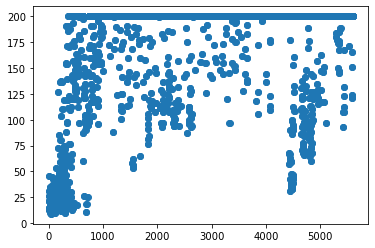

Episode =  2801  Epsilon =  5.499843364794545e-22
Episode =  2802  Epsilon =  5.390944560149084e-22
Episode =  2803  Epsilon =  5.284201989575509e-22
Episode =  2804  Epsilon =  5.179572958891932e-22
Episode =  2805  Epsilon =  5.077015619276066e-22
Episode =  2806  Epsilon =  4.991939229332046e-22
Episode =  2807  Epsilon =  4.893097102587701e-22
Episode =  2808  Epsilon =  4.796212084207563e-22
Episode =  2809  Epsilon =  4.701245422767774e-22
Episode =  2810  Epsilon =  4.608159134136086e-22
Episode =  2811  Epsilon =  4.516915986279238e-22
Episode =  2812  Epsilon =  4.427479484371115e-22
Episode =  2813  Epsilon =  4.339813856195844e-22
Episode =  2814  Epsilon =  4.253884037839785e-22
Episode =  2815  Epsilon =  4.169655659666972e-22
Episode =  2816  Epsilon =  4.0870950325721133e-22
Episode =  2817  Epsilon =  4.0061691345058983e-22
Episode =  2818  Epsilon =  3.9268455972670247e-22
Episode =  2819  Epsilon =  3.849092693555803e-22
Episode =  2820  Epsilon =  3.772879324284061e-

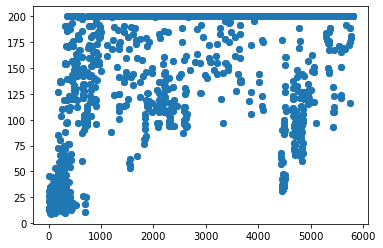

Episode =  2901  Epsilon =  7.63928035308183e-23
Episode =  2902  Epsilon =  7.488019954626238e-23
Episode =  2903  Epsilon =  7.339754564480776e-23
Episode =  2904  Epsilon =  7.194424880442971e-23
Episode =  2905  Epsilon =  7.051972774514485e-23
Episode =  2906  Epsilon =  6.9123412696515e-23
Episode =  2907  Epsilon =  6.77547451697542e-23
Episode =  2908  Epsilon =  6.651951855173945e-23
Episode =  2909  Epsilon =  6.520240903144921e-23
Episode =  2910  Epsilon =  6.391137873611737e-23
Episode =  2911  Epsilon =  6.264591128805186e-23
Episode =  2912  Epsilon =  6.140550053401767e-23
Episode =  2913  Epsilon =  6.018965034278945e-23
Episode =  2914  Epsilon =  5.899787440671183e-23
Episode =  2915  Epsilon =  5.782969604718983e-23
Episode =  2916  Epsilon =  5.66846480240295e-23
Episode =  2917  Epsilon =  5.556227234855489e-23
Episode =  2918  Epsilon =  5.44621201004246e-23
Episode =  2919  Epsilon =  5.338375124807541e-23
Episode =  2920  Epsilon =  5.232673447272164e-23
Episod

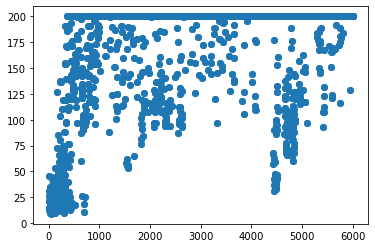

Episode =  3001  Epsilon =  1.0430018632830588e-23
Episode =  3002  Epsilon =  1.0223500649279322e-23
Episode =  3003  Epsilon =  1.0047159174588978e-23
Episode =  3004  Epsilon =  9.848221940994451e-24
Episode =  3005  Epsilon =  9.65322373356868e-24
Episode =  3006  Epsilon =  9.462086558228398e-24
Episode =  3007  Epsilon =  9.27473396520024e-24
Episode =  3008  Epsilon =  9.091091018442847e-24
Episode =  3009  Epsilon =  8.911084265674436e-24
Episode =  3010  Epsilon =  8.734641708993879e-24
Episode =  3011  Epsilon =  8.561692776083412e-24
Episode =  3012  Epsilon =  8.417381336884892e-24
Episode =  3013  Epsilon =  8.250714269291775e-24
Episode =  3014  Epsilon =  8.08734726739703e-24
Episode =  3015  Epsilon =  7.927214988756178e-24
Episode =  3016  Epsilon =  7.770253384727762e-24
Episode =  3017  Epsilon =  7.61639967485564e-24
Episode =  3018  Epsilon =  7.465592321758442e-24
Episode =  3019  Epsilon =  7.31777100651627e-24
Episode =  3020  Epsilon =  7.172876604544773e-24
Ep

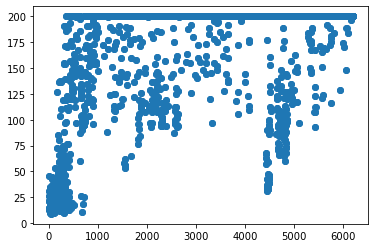

Episode =  3101  Epsilon =  1.4317354986871497e-24
Episode =  3102  Epsilon =  1.403386639631718e-24
Episode =  3103  Epsilon =  1.375599097810149e-24
Episode =  3104  Epsilon =  1.3483617589466805e-24
Episode =  3105  Epsilon =  1.3286867901210914e-24
Episode =  3106  Epsilon =  1.3102156979224429e-24
Episode =  3107  Epsilon =  1.2842729730359846e-24
Episode =  3108  Epsilon =  1.258843923092975e-24
Episode =  3109  Epsilon =  1.2339183771515133e-24
Episode =  3110  Epsilon =  1.2094863656578767e-24
Episode =  3111  Epsilon =  1.185538116458956e-24
Episode =  3112  Epsilon =  1.1620640508936666e-24
Episode =  3113  Epsilon =  1.1390547799617282e-24
Episode =  3114  Epsilon =  1.1165011005683198e-24
Episode =  3115  Epsilon =  1.0950507924191855e-24
Episode =  3116  Epsilon =  1.0733684072291164e-24
Episode =  3117  Epsilon =  1.0521153407800463e-24
Episode =  3118  Epsilon =  1.0323148397056962e-24
Episode =  3119  Epsilon =  1.0196957645195917e-24
Episode =  3120  Epsilon =  9.99505

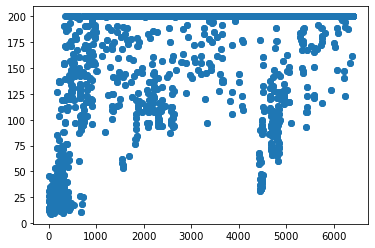

Episode =  3201  Epsilon =  1.9970496677089378e-25
Episode =  3202  Epsilon =  1.9612300054723123e-25
Episode =  3203  Epsilon =  1.9223969716812266e-25
Episode =  3204  Epsilon =  1.8939670074609274e-25
Episode =  3205  Epsilon =  1.8564658043410913e-25
Episode =  3206  Epsilon =  1.8197071380394236e-25
Episode =  3207  Epsilon =  1.7836763060695906e-25
Episode =  3208  Epsilon =  1.748358897059585e-25
Episode =  3209  Epsilon =  1.713740784987559e-25
Episode =  3210  Epsilon =  1.6798081235317908e-25
Episode =  3211  Epsilon =  1.6465473405325304e-25
Episode =  3212  Epsilon =  1.6139451325634937e-25
Episode =  3213  Epsilon =  1.581988459610845e-25
Episode =  3214  Epsilon =  1.5506645398575458e-25
Episode =  3215  Epsilon =  1.5199608445709623e-25
Episode =  3216  Epsilon =  1.4898650930917059e-25
Episode =  3217  Epsilon =  1.4603652479217077e-25
Episode =  3218  Epsilon =  1.4314495099095232e-25
Episode =  3219  Epsilon =  1.403106313531002e-25
Episode =  3220  Epsilon =  1.37532

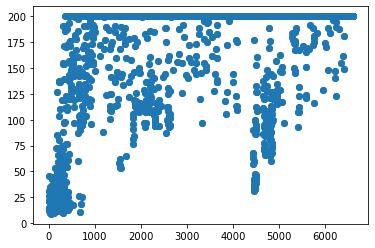

Episode =  3301  Epsilon =  2.721969397835956e-26
Episode =  3302  Epsilon =  2.668073460434666e-26
Episode =  3303  Epsilon =  2.615244681272066e-26
Episode =  3304  Epsilon =  2.5634619302451942e-26
Episode =  3305  Epsilon =  2.512704495634457e-26
Episode =  3306  Epsilon =  2.4629520758194805e-26
Episode =  3307  Epsilon =  2.41466763225509e-26
Episode =  3308  Epsilon =  2.3668563763106216e-26
Episode =  3309  Epsilon =  2.319991799803295e-26
Episode =  3310  Epsilon =  2.2740551581521714e-26
Episode =  3311  Epsilon =  2.2290280779255193e-26
Episode =  3312  Epsilon =  2.1848925494919136e-26
Episode =  3313  Epsilon =  2.1416309198168765e-26
Episode =  3314  Epsilon =  2.099225885402133e-26
Episode =  3315  Epsilon =  2.0576604853646645e-26
Episode =  3316  Epsilon =  2.016918094652818e-26
Episode =  3317  Epsilon =  1.9769824173967254e-26
Episode =  3318  Epsilon =  1.9378374803903866e-26
Episode =  3319  Epsilon =  1.8994676267028207e-26
Episode =  3320  Epsilon =  1.8618575094

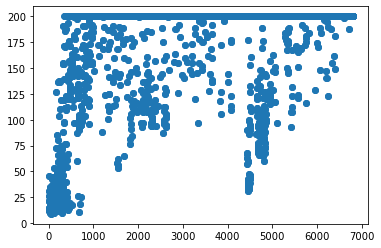

Episode =  3401  Epsilon =  3.689314535169892e-27
Episode =  3402  Epsilon =  3.6162648288068174e-27
Episode =  3403  Epsilon =  3.5446615319458026e-27
Episode =  3404  Epsilon =  3.4744760051774314e-27
Episode =  3405  Epsilon =  3.405680176162527e-27
Episode =  3406  Epsilon =  3.33824652840396e-27
Episode =  3407  Epsilon =  3.272148090240781e-27
Episode =  3408  Epsilon =  3.2073584240602655e-27
Episode =  3409  Epsilon =  3.1438516157235954e-27
Episode =  3410  Epsilon =  3.0816022642008707e-27
Episode =  3411  Epsilon =  3.0205854714113956e-27
Episode =  3412  Epsilon =  2.960776832265097e-27
Episode =  3413  Epsilon =  2.9021524249011426e-27
Episode =  3414  Epsilon =  2.8446888011198406e-27
Episode =  3415  Epsilon =  2.7883629770039625e-27
Episode =  3416  Epsilon =  2.7331524237258252e-27
Episode =  3417  Epsilon =  2.6790350585363305e-27
Episode =  3418  Epsilon =  2.6259892359324746e-27
Episode =  3419  Epsilon =  2.5739937389997044e-27
Episode =  3420  Epsilon =  2.5230277

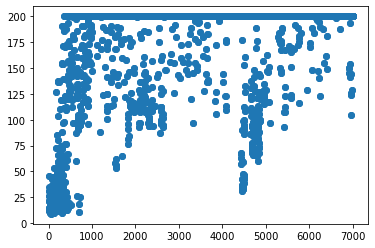

Episode =  3501  Epsilon =  5.322922898608103e-28
Episode =  3502  Epsilon =  5.217527180506593e-28
Episode =  3503  Epsilon =  5.114218334149361e-28
Episode =  3504  Epsilon =  5.012955038752655e-28
Episode =  3505  Epsilon =  4.913696791698559e-28
Episode =  3506  Epsilon =  4.8164038923350065e-28
Episode =  3507  Epsilon =  4.758003650606147e-28
Episode =  3508  Epsilon =  4.663793529393154e-28
Episode =  3509  Epsilon =  4.5714488012295895e-28
Episode =  3510  Epsilon =  4.480932530686594e-28
Episode =  3511  Epsilon =  4.392208513669615e-28
Episode =  3512  Epsilon =  4.305241262937721e-28
Episode =  3513  Epsilon =  4.21999599390964e-28
Episode =  3514  Epsilon =  4.13643861075086e-28
Episode =  3515  Epsilon =  4.054535692736217e-28
Episode =  3516  Epsilon =  3.9742544808824952e-28
Episode =  3517  Epsilon =  3.8955628648456954e-28
Episode =  3518  Epsilon =  3.8184293700777404e-28
Episode =  3519  Epsilon =  3.7428231452375286e-28
Episode =  3520  Epsilon =  3.668713949851206e

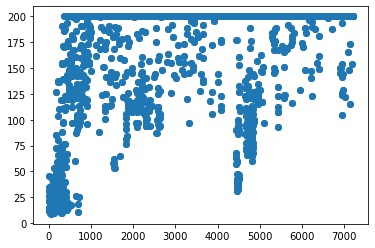

Episode =  3601  Epsilon =  7.441005897229265e-29
Episode =  3602  Epsilon =  7.293671401713435e-29
Episode =  3603  Epsilon =  7.149254180268977e-29
Episode =  3604  Epsilon =  7.007696469858258e-29
Episode =  3605  Epsilon =  6.868941651171836e-29
Episode =  3606  Epsilon =  6.732934225982196e-29
Episode =  3607  Epsilon =  6.59961979494596e-29
Episode =  3608  Epsilon =  6.468945035845611e-29
Episode =  3609  Epsilon =  6.340857682262029e-29
Episode =  3610  Epsilon =  6.215306502669266e-29
Episode =  3611  Epsilon =  6.11604622017019e-29
Episode =  3612  Epsilon =  6.038263588398333e-29
Episode =  3613  Epsilon =  5.918703876730912e-29
Episode =  3614  Epsilon =  5.850446979897785e-29
Episode =  3615  Epsilon =  5.73460610216829e-29
Episode =  3616  Epsilon =  5.621058913963586e-29
Episode =  3617  Epsilon =  5.509759999436189e-29
Episode =  3618  Epsilon =  5.400664841988114e-29
Episode =  3619  Epsilon =  5.293729806465462e-29
Episode =  3620  Epsilon =  5.188912121705508e-29
Epi

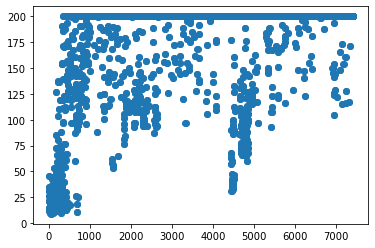

Episode =  3701  Epsilon =  1.0385281801306873e-29
Episode =  3702  Epsilon =  1.0179649622523742e-29
Episode =  3703  Epsilon =  9.978089032144294e-30
Episode =  3704  Epsilon =  9.780519411307075e-30
Episode =  3705  Epsilon =  9.586861737432062e-30
Episode =  3706  Epsilon =  9.397038552613654e-30
Episode =  3707  Epsilon =  9.210973932639671e-30
Episode =  3708  Epsilon =  9.028593456623614e-30
Episode =  3709  Epsilon =  8.849824177238358e-30
Episode =  3710  Epsilon =  8.6745945915391e-30
Episode =  3711  Epsilon =  8.502834612364146e-30
Episode =  3712  Epsilon =  8.334475540301891e-30
Episode =  3713  Epsilon =  8.169450036212894e-30
Episode =  3714  Epsilon =  8.007692094296003e-30
Episode =  3715  Epsilon =  7.849137015687797e-30
Episode =  3716  Epsilon =  7.693721382584802e-30
Episode =  3717  Epsilon =  7.541383032878e-30
Episode =  3718  Epsilon =  7.392061035289684e-30
Episode =  3719  Epsilon =  7.245695665002552e-30
Episode =  3720  Epsilon =  7.102228379771402e-30
Epi

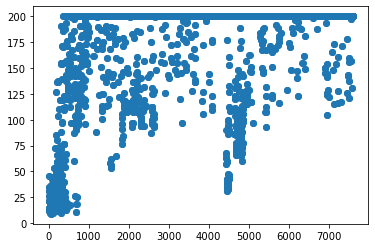

Episode =  3801  Epsilon =  1.485404054615772e-30
Episode =  3802  Epsilon =  1.4559925395536106e-30
Episode =  3803  Epsilon =  1.4271633826825179e-30
Episode =  3804  Epsilon =  1.3989050531084882e-30
Episode =  3805  Epsilon =  1.3819429388249927e-30
Episode =  3806  Epsilon =  1.3545799897109137e-30
Episode =  3807  Epsilon =  1.3277588364721817e-30
Episode =  3808  Epsilon =  1.3014687513627e-30
Episode =  3809  Epsilon =  1.2756992190494613e-30
Episode =  3810  Epsilon =  1.2504399324066993e-30
Episode =  3811  Epsilon =  1.2264163807429774e-30
Episode =  3812  Epsilon =  1.2055034315330299e-30
Episode =  3813  Epsilon =  1.1816340458101037e-30
Episode =  3814  Epsilon =  1.1589323983247303e-30
Episode =  3815  Epsilon =  1.1359851351989593e-30
Episode =  3816  Epsilon =  1.11349223583567e-30
Episode =  3817  Epsilon =  1.0914447036748983e-30
Episode =  3818  Epsilon =  1.0698337202916907e-30
Episode =  3819  Epsilon =  1.0486506418689598e-30
Episode =  3820  Epsilon =  1.0278869

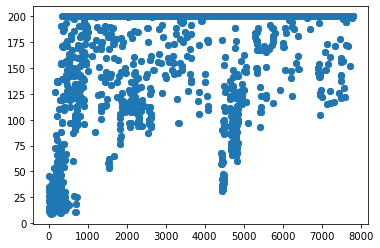

Episode =  3901  Epsilon =  2.0504738797467286e-31
Episode =  3902  Epsilon =  2.0098737863167e-31
Episode =  3903  Epsilon =  1.9700775888069367e-31
Episode =  3904  Epsilon =  1.9310693697996113e-31
Episode =  3905  Epsilon =  1.8928335270472974e-31
Episode =  3906  Epsilon =  1.85535476723247e-31
Episode =  3907  Epsilon =  1.8186180998505948e-31
Episode =  3908  Epsilon =  1.782608831214317e-31
Episode =  3909  Epsilon =  1.7473125585763909e-31
Episode =  3910  Epsilon =  1.7127151643689505e-31
Episode =  3911  Epsilon =  1.6788028105568705e-31
Episode =  3912  Epsilon =  1.6455619331029144e-31
Episode =  3913  Epsilon =  1.6129792365424875e-31
Episode =  3914  Epsilon =  1.5810416886657955e-31
Episode =  3915  Epsilon =  1.5497365153053211e-31
Episode =  3916  Epsilon =  1.5190511952264865e-31
Episode =  3917  Epsilon =  1.4889734551194998e-31
Episode =  3918  Epsilon =  1.4594912646903572e-31
Episode =  3919  Epsilon =  1.4305928318490415e-31
Episode =  3920  Epsilon =  1.4022665

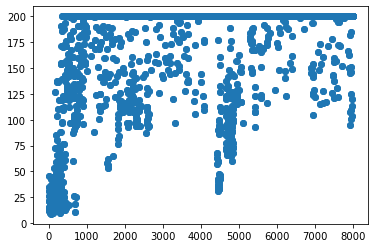

Episode =  4001  Epsilon =  3.0955034360184677e-32
Episode =  4002  Epsilon =  3.037550697061167e-32
Episode =  4003  Epsilon =  2.977406140567545e-32
Episode =  4004  Epsilon =  2.9184524671361596e-32
Episode =  4005  Epsilon =  2.8606660968696615e-32
Episode =  4006  Epsilon =  2.804023916760861e-32
Episode =  4007  Epsilon =  2.74850327144809e-32
Episode =  4008  Epsilon =  2.6940819541537165e-32
Episode =  4009  Epsilon =  2.6407381978019907e-32
Episode =  4010  Epsilon =  2.5884506663128094e-32
Episode =  4011  Epsilon =  2.5371984460678534e-32
Episode =  4012  Epsilon =  2.4869610375456846e-32
Episode =  4013  Epsilon =  2.4377183471225002e-32
Episode =  4014  Epsilon =  2.3894506790352155e-32
Episode =  4015  Epsilon =  2.3421387275036755e-32
Episode =  4016  Epsilon =  2.2957635690088615e-32
Episode =  4017  Epsilon =  2.2503066547239937e-32
Episode =  4018  Epsilon =  2.2057498030954852e-32
Episode =  4019  Epsilon =  2.1620751925708217e-32
Episode =  4020  Epsilon =  2.119265

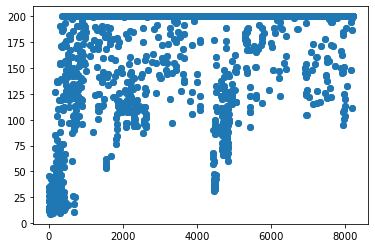

Episode =  4101  Epsilon =  4.2914919243180614e-33
Episode =  4102  Epsilon =  4.206518896959608e-33
Episode =  4103  Epsilon =  4.123228364991053e-33
Episode =  4104  Epsilon =  4.041587014420602e-33
Episode =  4105  Epsilon =  3.961562190885017e-33
Episode =  4106  Epsilon =  3.883121886588793e-33
Episode =  4107  Epsilon =  3.806234727501865e-33
Episode =  4108  Epsilon =  3.730869960810828e-33
Episode =  4109  Epsilon =  3.656997442618641e-33
Episode =  4110  Epsilon =  3.61121062681156e-33
Episode =  4111  Epsilon =  3.572421330685931e-33
Episode =  4112  Epsilon =  3.532635418029351e-33
Episode =  4113  Epsilon =  3.462688012484288e-33
Episode =  4114  Epsilon =  3.394125589809946e-33
Episode =  4115  Epsilon =  3.3269207268655124e-33
Episode =  4116  Epsilon =  3.261046543497854e-33
Episode =  4117  Epsilon =  3.196476691790198e-33
Episode =  4118  Epsilon =  3.1331853455236334e-33
Episode =  4119  Epsilon =  3.0711471898473686e-33
Episode =  4120  Epsilon =  3.0103374111534006e

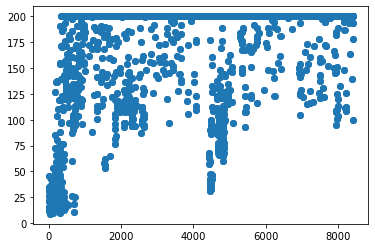

Episode =  4201  Epsilon =  6.09834298136983e-34
Episode =  4202  Epsilon =  5.977593676900499e-34
Episode =  4203  Epsilon =  5.859235250506466e-34
Episode =  4204  Epsilon =  5.7432203619732606e-34
Episode =  4205  Epsilon =  5.629502608439067e-34
Episode =  4206  Epsilon =  5.518036505834812e-34
Episode =  4207  Epsilon =  5.408777470691748e-34
Episode =  4208  Epsilon =  5.3016818023092646e-34
Episode =  4209  Epsilon =  5.196706665275771e-34
Episode =  4210  Epsilon =  5.093810072335663e-34
Episode =  4211  Epsilon =  4.992950867595545e-34
Episode =  4212  Epsilon =  4.894088710062998e-34
Episode =  4213  Epsilon =  4.7971840575112e-34
Episode =  4214  Epsilon =  4.721515771278789e-34
Episode =  4215  Epsilon =  4.628028122721695e-34
Episode =  4216  Epsilon =  4.536391562005055e-34
Episode =  4217  Epsilon =  4.446569436948127e-34
Episode =  4218  Epsilon =  4.358525821096025e-34
Episode =  4219  Epsilon =  4.272225499350146e-34
Episode =  4220  Epsilon =  4.187633953883021e-34
E

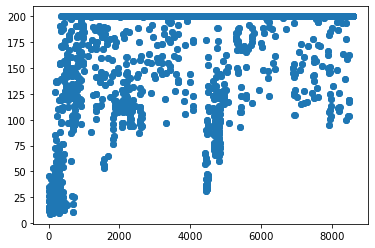

Episode =  4301  Epsilon =  8.690231714134264e-35
Episode =  4302  Epsilon =  8.518162114512735e-35
Episode =  4303  Epsilon =  8.349499552596053e-35
Episode =  4304  Epsilon =  8.184176567856922e-35
Episode =  4305  Epsilon =  8.022127035509869e-35
Episode =  4306  Epsilon =  7.863286140063076e-35
Episode =  4307  Epsilon =  7.707590349393936e-35
Episode =  4308  Epsilon =  7.554977389337885e-35
Episode =  4309  Epsilon =  7.405386218780415e-35
Episode =  4310  Epsilon =  7.258757005242203e-35
Episode =  4311  Epsilon =  7.115031100947785e-35
Episode =  4312  Epsilon =  6.97415101936796e-35
Episode =  4313  Epsilon =  6.836060412226737e-35
Episode =  4314  Epsilon =  6.700704046963508e-35
Episode =  4315  Epsilon =  6.568027784641513e-35
Episode =  4316  Epsilon =  6.437978558293707e-35
Episode =  4317  Epsilon =  6.310504351697371e-35
Episode =  4318  Epsilon =  6.185554178569023e-35
Episode =  4319  Epsilon =  6.063078062171279e-35
Episode =  4320  Epsilon =  5.94302701532347e-35
Ep

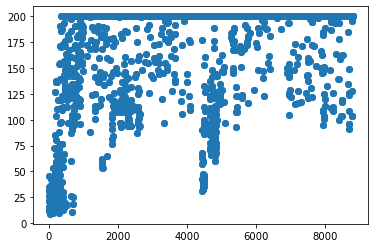

Episode =  4401  Epsilon =  1.2945909830175525e-35
Episode =  4402  Epsilon =  1.268957632901103e-35
Episode =  4403  Epsilon =  1.2438318320004404e-35
Episode =  4404  Epsilon =  1.2192035306651935e-35
Episode =  4405  Epsilon =  1.1950628782315536e-35
Episode =  4406  Epsilon =  1.1714002190822705e-35
Episode =  4407  Epsilon =  1.1482060887846595e-35
Episode =  4408  Epsilon =  1.1254712103050855e-35
Episode =  4409  Epsilon =  1.1031864902983933e-35
Episode =  4410  Epsilon =  1.0813430154708142e-35
Episode =  4411  Epsilon =  1.0599320490148825e-35
Episode =  4412  Epsilon =  1.0389450271149511e-35
Episode =  4413  Epsilon =  1.018373555521888e-35
Episode =  4414  Epsilon =  9.982094061956047e-36
Episode =  4415  Epsilon =  9.784445140140584e-36
Episode =  4416  Epsilon =  9.590709735474158e-36
Episode =  4417  Epsilon =  9.400810358960956e-36
Episode =  4418  Epsilon =  9.214671055914138e-36
Episode =  4419  Epsilon =  9.03221737557598e-36
Episode =  4420  Epsilon =  8.8533763413

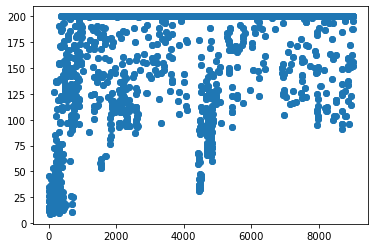

Episode =  4501  Epsilon =  1.9135793310891473e-36
Episode =  4502  Epsilon =  1.875689797164637e-36
Episode =  4503  Epsilon =  1.838550489142809e-36
Episode =  4504  Epsilon =  1.8021465522907885e-36
Episode =  4505  Epsilon =  1.7664634260045664e-36
Episode =  4506  Epsilon =  1.731486837985133e-36
Episode =  4507  Epsilon =  1.6972027985299512e-36
Episode =  4508  Epsilon =  1.663597594937438e-36
Episode =  4509  Epsilon =  1.630657786022258e-36
Episode =  4510  Epsilon =  1.5983701967391987e-36
Episode =  4511  Epsilon =  1.566721912913511e-36
Episode =  4512  Epsilon =  1.5357002760755855e-36
Episode =  4513  Epsilon =  1.505292878397891e-36
Episode =  4514  Epsilon =  1.4754875577321846e-36
Episode =  4515  Epsilon =  1.4462723927449744e-36
Episode =  4516  Epsilon =  1.4176356981493014e-36
Episode =  4517  Epsilon =  1.3895660200309378e-36
Episode =  4518  Epsilon =  1.3620521312671314e-36
Episode =  4519  Epsilon =  1.3350830270360452e-36
Episode =  4520  Epsilon =  1.30864792

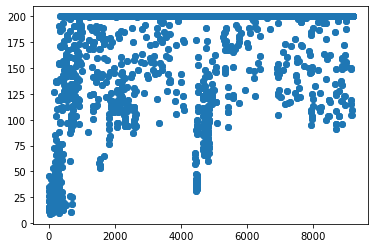

Episode =  4601  Epsilon =  2.710026206482646e-37
Episode =  4602  Epsilon =  2.6563667484091807e-37
Episode =  4603  Epsilon =  2.6037697662017568e-37
Episode =  4604  Epsilon =  2.5522142224700205e-37
Episode =  4605  Epsilon =  2.501679496371231e-37
Episode =  4606  Epsilon =  2.4521453753624824e-37
Episode =  4607  Epsilon =  2.4035920471162246e-37
Episode =  4608  Epsilon =  2.356000091595857e-37
Episode =  4609  Epsilon =  2.309350473288233e-37
Episode =  4610  Epsilon =  2.2636245335899603e-37
Episode =  4611  Epsilon =  2.21880398334447e-37
Episode =  4612  Epsilon =  2.1748708955268246e-37
Episode =  4613  Epsilon =  2.1318076980733945e-37
Episode =  4614  Epsilon =  2.0895971668535022e-37
Episode =  4615  Epsilon =  2.0482224187802196e-37
Episode =  4616  Epsilon =  2.007666905057595e-37
Episode =  4617  Epsilon =  1.9679144045615756e-37
Episode =  4618  Epsilon =  1.9289490173519805e-37
Episode =  4619  Epsilon =  1.8907551583129524e-37
Episode =  4620  Epsilon =  1.85331755

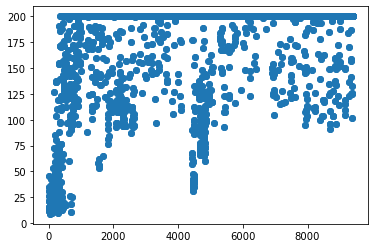

Episode =  4701  Epsilon =  3.946541918127901e-38
Episode =  4702  Epsilon =  3.868399020437689e-38
Episode =  4703  Epsilon =  3.7918033792028955e-38
Episode =  4704  Epsilon =  3.7167243582094947e-38
Episode =  4705  Epsilon =  3.643131927851108e-38
Episode =  4706  Epsilon =  3.570996653117967e-38
Episode =  4707  Epsilon =  3.500289681823701e-38
Episode =  4708  Epsilon =  3.430982733065228e-38
Episode =  4709  Epsilon =  3.363048085911146e-38
Episode =  4710  Epsilon =  3.2964585683141074e-38
Episode =  4711  Epsilon =  3.2311875462427154e-38
Episode =  4712  Epsilon =  3.167208913028623e-38
Episode =  4713  Epsilon =  3.10449707892457e-38
Episode =  4714  Epsilon =  3.043026960869151e-38
Episode =  4715  Epsilon =  2.9827739724542794e-38
Episode =  4716  Epsilon =  2.923714014091262e-38
Episode =  4717  Epsilon =  2.865823463371618e-38
Episode =  4718  Epsilon =  2.809079165618742e-38
Episode =  4719  Epsilon =  2.7534584246266436e-38
Episode =  4720  Epsilon =  2.698938993582078

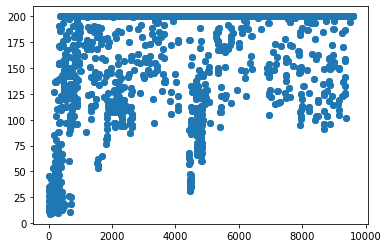

Episode =  4801  Epsilon =  5.344803540432522e-39
Episode =  4802  Epsilon =  5.2389745780399356e-39
Episode =  4803  Epsilon =  5.1352410657787454e-39
Episode =  4804  Epsilon =  5.033561513010159e-39
Episode =  4805  Epsilon =  4.933895250624395e-39
Episode =  4806  Epsilon =  4.836202414774154e-39
Episode =  4807  Epsilon =  4.740443930930116e-39
Episode =  4808  Epsilon =  4.646581498252197e-39
Episode =  4809  Epsilon =  4.554577574270213e-39
Episode =  4810  Epsilon =  4.464395359867897e-39
Episode =  4811  Epsilon =  4.3759987845642425e-39
Episode =  4812  Epsilon =  4.3056822219208715e-39
Episode =  4813  Epsilon =  4.220428221752106e-39
Episode =  4814  Epsilon =  4.136862280332254e-39
Episode =  4815  Epsilon =  4.064694055725726e-39
Episode =  4816  Epsilon =  4.039976124195254e-39
Episode =  4817  Epsilon =  4.0101921267492024e-39
Episode =  4818  Epsilon =  3.9619635844807437e-39
Episode =  4819  Epsilon =  3.8835153324522186e-39
Episode =  4820  Epsilon =  3.8371939486238

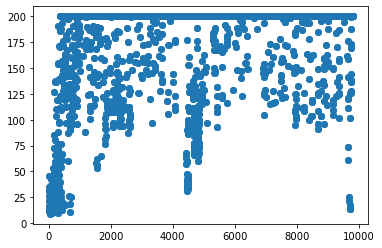

Episode =  4901  Epsilon =  9.337113106420703e-40
Episode =  4902  Epsilon =  9.152235031049054e-40
Episode =  4903  Epsilon =  8.971017605641018e-40
Episode =  4904  Epsilon =  8.793388348058654e-40
Episode =  4905  Epsilon =  8.619276211335514e-40
Episode =  4906  Epsilon =  8.448611555259705e-40
Episode =  4907  Epsilon =  8.28132611851963e-40
Episode =  4908  Epsilon =  8.117352991401356e-40
Episode =  4909  Epsilon =  7.956626589026452e-40
Episode =  4910  Epsilon =  7.799082625119825e-40
Episode =  4911  Epsilon =  7.644658086296888e-40
Episode =  4912  Epsilon =  7.493291206859912e-40
Episode =  4913  Epsilon =  7.344921444093425e-40
Episode =  4914  Epsilon =  7.199489454048655e-40
Episode =  4915  Epsilon =  7.0583485257905324e-40
Episode =  4916  Epsilon =  6.9185907788427e-40
Episode =  4917  Epsilon =  6.805376279654606e-40
Episode =  4918  Epsilon =  6.670627470850187e-40
Episode =  4919  Epsilon =  6.538546735158562e-40
Episode =  4920  Epsilon =  6.409081243807453e-40
Ep

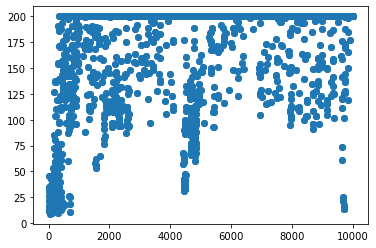

Episode =  5001  Epsilon =  1.2900694815854214e-40
Episode =  5002  Epsilon =  1.2645256587642971e-40
Episode =  5003  Epsilon =  1.2394876124874833e-40
Episode =  5004  Epsilon =  1.214945328204122e-40
Episode =  5005  Epsilon =  1.1908889896549297e-40
Episode =  5006  Epsilon =  1.167308974945965e-40
Episode =  5007  Epsilon =  1.1441958527001124e-40
Episode =  5008  Epsilon =  1.121540378284797e-40
Episode =  5009  Epsilon =  1.099333490114373e-40
Episode =  5010  Epsilon =  1.0775663060257323e-40
Episode =  5011  Epsilon =  1.0562301197256673e-40
Episode =  5012  Epsilon =  1.0353163973085993e-40
Episode =  5013  Epsilon =  1.0148167738432365e-40
Episode =  5014  Epsilon =  9.947230500268257e-41
Episode =  5015  Epsilon =  9.750271889056498e-41
Episode =  5016  Epsilon =  9.557213126604607e-41
Episode =  5017  Epsilon =  9.367976994555587e-41
Episode =  5018  Epsilon =  9.182487803502693e-41
Episode =  5019  Epsilon =  9.018689816981833e-41
Episode =  5020  Epsilon =  8.84011663309

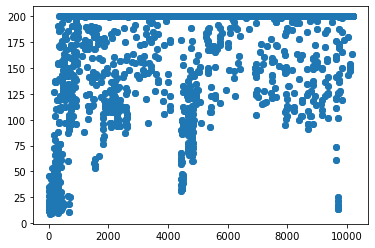

Episode =  5101  Epsilon =  1.8104571004254353e-41
Episode =  5102  Epsilon =  1.7746094224060492e-41
Episode =  5103  Epsilon =  1.7394715408347953e-41


KeyboardInterrupt: 

In [16]:
for i in range(episodes):
    print("Episode = ", i, " Epsilon = ", eps)
    state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)

    done = False
    steps = 0
    eps_rew = 0 
    eps_loss = 0
    while not done and steps<max_steps:
        if np.random.uniform(0,1)<eps:
            action = env.action_space.sample()
        else:
#             action = env.action_space.sample()
            action = np.argmax(model(state).detach().numpy())
                

        next_state, reward, done, info = env.step(action)
        replay_buffer.append((state, next_state, reward, done, action))
        if len(replay_buffer)>batch_size and steps%4==0:
            loss = compute_td_loss(batch_size)
            eps_loss += loss.detach().numpy()
        eps = eps/(1 + decay_val)
        eps_rew += reward 
        
        if steps%50==0:
            target.load_state_dict(model.state_dict())
        
        if done:
            tot_rewards.append(eps_rew)
            break
        
        state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        steps += 1
    tot_rewards.append(eps_rew)
    tot_loss.append(eps_loss)
    
    if(i%100)==0:
        plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
        plt.show()

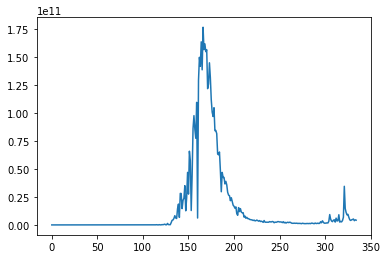

In [149]:
plt.plot(tot_loss)

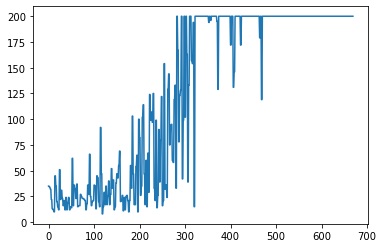

In [150]:
#Plot
plt.plot(tot_rewards)

In [152]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(1000):
    
    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()
